In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from collections import defaultdict

from evaluation import (
    eval,
    eval_multi,
    logger,
    MODE_ADVERSARY,
    MODE_ADVERSARY_RANDOMIZE,
    MODE_RANDOM,
    MODE_ADV_TASK_DIVERSITY,
)

plt.rcParams["text.usetex"] = False
%load_ext autoreload
%autoreload 2

In [24]:
T = 2000  # Timesteps/horizon
n_task = 6000
alpha_set = [1.0]  # Bonus for UCB
v_set = [1.0]  # Bonus for TS
alpha_PHE_set = [1.0]  # Bonus for PHE
tau_1_PEGE_set = [T // 2]  # EXR length for PEGE
is_multi = True
input_dict = {
    "d": 10,  # n_dims
    "unit_ball_action": True,
    # "n_gen_context":20, #if not unit ball action set, how many action sampled from the action set
    "T": T,  # Timesteps/horizon
    "n_sim": 5,  # Number of Simulations
    "rho": 0.5,
    "noise_std": 1,
    "seed": None,  # TODO: bug here, must set to None
    "output": True,
    "params_set": alpha_set,
    "m": 3,  # n_dims latent
    "n_task": n_task,
    "mode": MODE_ADV_TASK_DIVERSITY,
    "adv_exr_const": 0.1,  # scaling factor for adversary task generation
    "adv_exr_task": None,  # specific tasks to reveal a new dimension
    "PMA_exr_const": 1.5,  # scaling factor for exploration probability
    "PMA_lr_const": 1,  # scaling factor for the learning rate
    "PMA_n_expert": 100000,  # Expert set size for PMA
    "PMA_tau1_const": 1,  # scaling factor for PEGE's EXR length in the EXR phase
    "PMA_tau2_const": 1,  # scaling factor for PEGE's EXR length in the EXT phase
    "PMA_alpha_const": 1,  # scaling factor for PMA's alpha threshold
    "p_decay_rate": 0,  # decay rate for EXR prob. May be useful for Task Diversity setting
    "PMA_stop_exr": n_task,  # Stop EXR after PMA_stop_exr step
    "PMA_no_oracle": False,
    "SeqRepL_exr_const": 1.5,
    "SeqRepL_tau1_const": 1,
    "SeqRepL_tau2_const": 1,
    "SeqRepL_stop_exr": n_task,  # Stop EXR after PMA_stop_exr step
    "fixed_params": [0.1, 400, 50],  # fixed params for [p, tau1, tau2]
    "SeqRepL_exr_list": None,
}


def get_SeqRepL_exr_list(n_task):
    SeqRepL_exr_list = []
    i = 0
    while i**2 <= n_task:
        SeqRepL_exr_list.append(i**2)
        i += 1
    return SeqRepL_exr_list


def check_params():
    m = input_dict["m"]
    d = input_dict["d"]
    assert m <= d, "m >= d"
    assert m <= d, "m >= d"
    if T < d**2:
        logger.info(f"Warning: T < d**2")
    if n_task < np.sqrt(T):
        logger.info(f"Warning: n_task < np.sqrt(T)")
    if input_dict["adv_exr_task"] is not None:
        assert (
            max(input_dict["adv_exr_task"]) < input_dict["n_task"]
        ), f"max exr task ({max(input_dict["adv_exr_task"])}) is larger than n_task ({input_dict["n_task"]})"
        assert (
            len(input_dict["adv_exr_task"]) == input_dict["m"]
        ), f"exr list (len={len(input_dict["adv_exr_task"])}) is incorrect (!= m ({input_dict["m"]}))"


def load_dict(name):
    input_dict = np.load(name, allow_pickle="TRUE").item()
    input_dict = defaultdict(int, input_dict)
    mean_PEGE2 = input_dict["mean_PEGE2"]
    std_PEGE2 = input_dict["std_PEGE2"]
    mean_PEGE_oracle2 = input_dict["mean_PEGE_oracle2"]
    std_PEGE_oracle2 = input_dict["std_PEGE_oracle2"]
    mean_PMA2 = input_dict["mean_PMA2"]
    std_PMA2 = input_dict["std_PMA2"]
    mean_PMA_no_oracle2 = input_dict["mean_PMA_no_oracle2"]
    std_PMA_no_oracle2 = input_dict["std_PMA_no_oracle2"]
    mean_SeqRepL2 = input_dict["mean_SeqRepL2"]
    std_SeqRepL2 = input_dict["std_SeqRepL2"]
    mean_BARON2 = input_dict["mean_BARON2"]
    std_BARON2 = input_dict["std_BARON2"]
    return (
        mean_PEGE2,
        std_PEGE2,
        mean_PEGE_oracle2,
        std_PEGE_oracle2,
        mean_PMA2,
        std_PMA2,
        mean_PMA_no_oracle2,
        std_PMA_no_oracle2,
        mean_SeqRepL2,
        std_SeqRepL2,
        mean_BARON2,
        std_BARON2,
    )


# input_dict["fixed_params"] = None # fixed params for [p, tau1, tau2]
# input_dict["fixed_params"] = [0.1, 400, 50] # fixed params for [p, tau1, tau2]
input_dict["fixed_params"] = [0.15, 1000, 300]  # fixed params for [p, tau1, tau2]

# With Task Diversity

In [3]:
check_params()

In [ ]:
input_dict["name"] = "PEGE"
input_dict["params_set"] = [190, 210]  # tau_1
best_PEGE = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PEGE_oracle"
input_dict["params_set"] = [45, 55]  # tau_2
best_PEGE_oracle = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PMA"
input_dict["params_set"] = [None]  # Placeholder
input_dict["PMA_no_oracle"] = False
best_PMA = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PMA"
input_dict["PMA_no_oracle"] = True
best_PMA_no_oracle = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "SeqRepL"
best_SeqRepL = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "BARON"
best_BARON = eval_multi(input_dict)

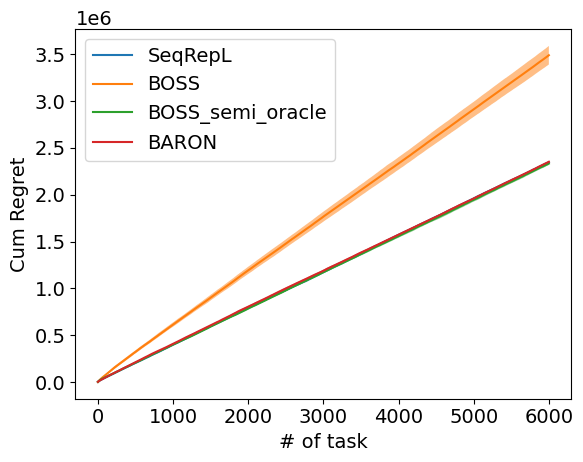

In [ ]:
plot_prev_data = True
plt.rcParams.update({'font.size': 14})
if plot_prev_data:
    (
        mean_PEGE,
        std_PEGE,
        mean_PEGE_oracle,
        std_PEGE_oracle,
        mean_PMA,
        std_PMA,
        mean_PMA_no_oracle,
        std_PMA_no_oracle,
        mean_SeqRepL,
        std_SeqRepL,
        mean_BARON,
        std_BARON,
    ) = load_dict("cache_data/TaskDiv_RegExp2.npy")
else:
    mean_PEGE = np.mean(best_PEGE["regrets"], axis=0)
    std_PEGE = np.std(best_PEGE["regrets"], axis=0)
    mean_PEGE_oracle = np.mean(best_PEGE_oracle["regrets"], axis=0)
    std_PEGE_oracle = np.std(best_PEGE_oracle["regrets"], axis=0)
    mean_PMA = np.mean(best_PMA["regrets"], axis=0)
    std_PMA = np.std(best_PMA["regrets"], axis=0)
    mean_PMA_no_oracle = np.mean(best_PMA_no_oracle["regrets"], axis=0)
    std_PMA_no_oracle = np.std(best_PMA_no_oracle["regrets"], axis=0)
    mean_SeqRepL = np.mean(best_SeqRepL["regrets"], axis=0)
    std_SeqRepL = np.std(best_SeqRepL["regrets"], axis=0)
    mean_BARON = np.mean(best_BARON["regrets"], axis=0)
    std_BARON = np.std(best_BARON["regrets"], axis=0)
X = np.arange(1, n_task + 1)
plt.plot(X, mean_SeqRepL, "-", label="SeqRepL")
plt.fill_between(X, mean_SeqRepL - std_SeqRepL, mean_SeqRepL + std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, "-", label="BOSS")
plt.fill_between(
    X,
    mean_PMA_no_oracle - std_PMA_no_oracle,
    mean_PMA_no_oracle + std_PMA_no_oracle,
    alpha=0.5,
)
plt.plot(X, mean_PMA, "-", label="BOSS_semi_oracle")
plt.fill_between(X, mean_PMA - std_PMA, mean_PMA + std_PMA, alpha=0.5)
# plt.plot(X, mean_PEGE, "-", label="PEGE")
# plt.fill_between(X, mean_PEGE - std_PEGE, mean_PEGE + std_PEGE, alpha=0.5)
# plt.plot(X, mean_PEGE_oracle, "-", label="PEGE_oracle")
# plt.fill_between(
#     X, mean_PEGE_oracle - std_PEGE_oracle, mean_PEGE_oracle + std_PEGE_oracle, alpha=0.5
# )
plt.plot(X, mean_BARON, "-", label="BARON")
plt.fill_between(X, mean_BARON - std_BARON, mean_BARON + std_BARON, alpha=0.5)
plt.xlabel("# of task")
plt.ylabel("Cum Regret")
plt.legend()
plt.savefig('figures/div_reg.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
# plt.close()
# output_dict = {
#     "mean_PEGE2":mean_PEGE,
#     "std_PEGE2":std_PEGE,
#     "mean_PEGE_oracle2":mean_PEGE_oracle,
#     "std_PEGE_oracle2":std_PEGE_oracle,
#     "mean_PMA2":mean_PMA,
#     "std_PMA2":std_PMA,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle,
#     "std_PMA_no_oracle2":std_PMA_no_oracle,
#     "mean_SeqRepL2":mean_SeqRepL,
#     "std_SeqRepL2":std_SeqRepL,
#     "mean_BARON2":mean_BARON,
#     "std_BARON2":std_BARON,
# }
# np.save('cache_data/TaskDiv_RegExp2.npy', output_dict)

2025-05-25 01:08:55 Substituting symbol \perp from STIXGeneral
2025-05-25 01:08:55 Substituting symbol \perp from STIXGeneral
2025-05-25 01:08:55 Substituting symbol \perp from STIXGeneral
2025-05-25 01:08:55 Substituting symbol \perp from STIXGeneral
2025-05-25 01:08:55 Substituting symbol \perp from STIXGeneral
2025-05-25 01:08:55 Substituting symbol \perp from STIXGeneral
2025-05-25 01:08:55 Substituting symbol \perp from STIXGeneral
2025-05-25 01:08:55 Substituting symbol \perp from STIXGeneral


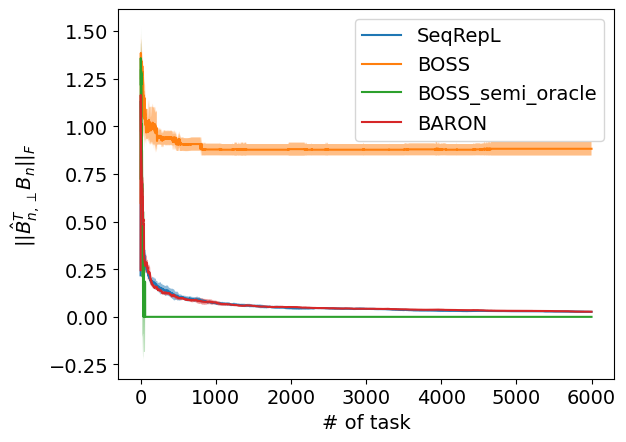

In [ ]:
if plot_prev_data:
    (
        mean_PEGE,
        std_PEGE,
        mean_PEGE_oracle,
        std_PEGE_oracle,
        mean_PMA,
        std_PMA,
        mean_PMA_no_oracle,
        std_PMA_no_oracle,
        mean_SeqRepL,
        std_SeqRepL,
        mean_BARON,
        std_BARON,
    ) = load_dict("cache_data/TaskDiv_B2.npy")
else:
    mean_PMA = np.mean(best_PMA["B_hat_err"], axis=0)
    std_PMA = np.std(best_PMA["B_hat_err"], axis=0)
    mean_SeqRepL = np.mean(best_SeqRepL["B_hat_err"], axis=0)
    std_SeqRepL = np.std(best_SeqRepL["B_hat_err"], axis=0)
    mean_PMA_no_oracle = np.mean(best_PMA_no_oracle["B_hat_err"], axis=0)
    std_PMA_no_oracle = np.std(best_PMA_no_oracle["B_hat_err"], axis=0)
    mean_BARON = np.mean(best_BARON["B_hat_err"], axis=0)
    std_BARON = np.std(best_BARON["B_hat_err"], axis=0)
plt.plot(X, mean_SeqRepL, "-", label="SeqRepL")
plt.fill_between(X, mean_SeqRepL - std_SeqRepL, mean_SeqRepL + std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, "-", label="BOSS")
plt.fill_between(
    X,
    mean_PMA_no_oracle - std_PMA_no_oracle,
    mean_PMA_no_oracle + std_PMA_no_oracle,
    alpha=0.5,
)
plt.plot(X, mean_PMA, "-", label="BOSS_semi_oracle")
plt.fill_between(X, mean_PMA - std_PMA, mean_PMA + std_PMA, alpha=0.5)
plt.plot(X, mean_BARON, "-", label="BARON")
plt.fill_between(X, mean_BARON - std_BARON, mean_BARON + std_BARON, alpha=0.5)
plt.xlabel("# of task")
plt.ylabel(r"$||\hat{B}_{n, \perp}^T B_n||_F$")
plt.legend()
plt.savefig('figures/div_B.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
# plt.close()
# output_dict = {
#     "mean_PMA2":mean_PMA,
#     "std_PMA2":std_PMA,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle,
#     "std_PMA_no_oracle2":std_PMA_no_oracle,
#     "mean_SeqRepL2":mean_SeqRepL,
#     "std_SeqRepL2":std_SeqRepL,
#     "mean_BARON2":mean_BARON,
#     "std_BARON2":std_BARON,
# }
# np.save('cache_data/TaskDiv_B2.npy', output_dict)

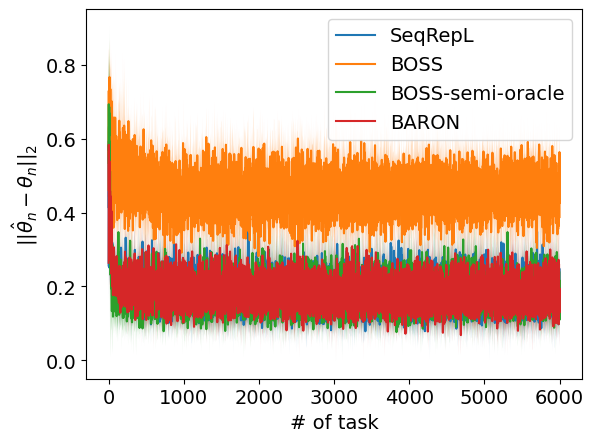

In [ ]:
if plot_prev_data:
    (
        mean_PEGE,
        std_PEGE,
        mean_PEGE_oracle,
        std_PEGE_oracle,
        mean_PMA,
        std_PMA,
        mean_PMA_no_oracle,
        std_PMA_no_oracle,
        mean_SeqRepL,
        std_SeqRepL,
        mean_BARON,
        std_BARON,
    ) = load_dict("cache_data/TaskDiv_theta2.npy")
else:
    mean_PMA = np.mean(best_PMA["theta_hat_err"], axis=0)
    std_PMA = np.std(best_PMA["theta_hat_err"], axis=0)
    mean_SeqRepL = np.mean(best_SeqRepL["theta_hat_err"], axis=0)
    std_SeqRepL = np.std(best_SeqRepL["theta_hat_err"], axis=0)
    mean_PMA_no_oracle = np.mean(best_PMA_no_oracle["theta_hat_err"], axis=0)
    std_PMA_no_oracle = np.std(best_PMA_no_oracle["theta_hat_err"], axis=0)
    mean_BARON = np.mean(best_BARON["theta_hat_err"], axis=0)
    std_BARON = np.std(best_BARON["theta_hat_err"], axis=0)

X = np.arange(1, n_task + 1)
plt.plot(X, mean_SeqRepL, "-", label="SeqRepL")
plt.fill_between(X, mean_SeqRepL - std_SeqRepL, mean_SeqRepL + std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, "-", label="BOSS")
plt.fill_between(
    X,
    mean_PMA_no_oracle - std_PMA_no_oracle,
    mean_PMA_no_oracle + std_PMA_no_oracle,
    alpha=0.5,
)
plt.plot(X, mean_PMA, "-", label="BOSS-semi-oracle")
plt.fill_between(X, mean_PMA - std_PMA, mean_PMA + std_PMA, alpha=0.5)
plt.plot(X, mean_BARON, "-", label="BARON")
plt.fill_between(X, mean_BARON - std_BARON, mean_BARON + std_BARON, alpha=0.5)
plt.xlabel("# of task")
plt.ylabel(r"$||\hat{\theta}_n - \theta_n||_2$")
plt.legend()
plt.show()
# plt.close()
# output_dict = {
#     "mean_PMA2":mean_PMA,
#     "std_PMA2":std_PMA,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle,
#     "std_PMA_no_oracle2":std_PMA_no_oracle,
#     "mean_SeqRepL2":mean_SeqRepL,
#     "std_SeqRepL2":std_SeqRepL,
#     "mean_BARON2":mean_BARON,
#     "std_BARON2":std_BARON,
# }
# np.save('cache_data/TaskDiv_theta2.npy', output_dict)

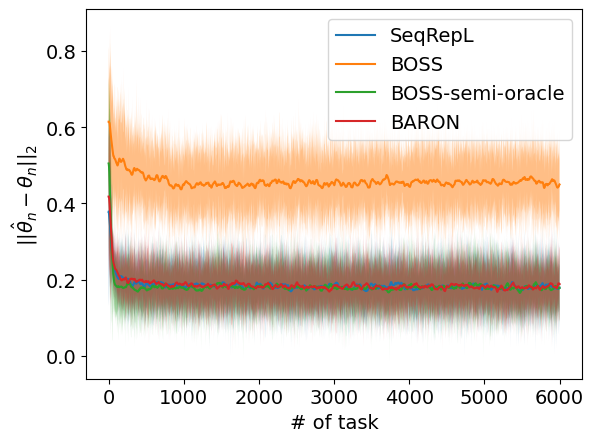

In [30]:
rbf = Rbf(X, mean_PMA_no_oracle, function="multiquadric", smooth=500)
y_PMA_no_oracle_rbf = rbf(X)
rbf = Rbf(X, mean_PMA, function="multiquadric", smooth=500)
y_PMA_rbf = rbf(X)
rbf = Rbf(X, mean_SeqRepL, function="multiquadric", smooth=500)
y_SeqRepL_rbf = rbf(X)
rbf = Rbf(X, mean_BARON, function="multiquadric", smooth=500)
y_BARON_rbf = rbf(X)

plt.plot(X, y_SeqRepL_rbf, "-", label="SeqRepL")
plt.fill_between(X, y_SeqRepL_rbf - std_SeqRepL, y_SeqRepL_rbf + std_SeqRepL, alpha=0.5)
plt.plot(X, y_PMA_no_oracle_rbf, "-", label="BOSS")
plt.fill_between(
    X,
    y_PMA_no_oracle_rbf - std_PMA_no_oracle,
    y_PMA_no_oracle_rbf + std_PMA_no_oracle,
    alpha=0.5,
)
plt.plot(X, y_PMA_rbf, "-", label="BOSS-semi-oracle")
plt.fill_between(X, y_PMA_rbf - std_PMA, y_PMA_rbf + std_PMA, alpha=0.5)
plt.plot(X, y_BARON_rbf, "-", label="BARON")
plt.fill_between(X, y_BARON_rbf - std_BARON, y_BARON_rbf + std_BARON, alpha=0.5)
plt.xlabel("# of task")
plt.ylabel(r"$||\hat{\theta}_n - \theta_n||_2$")

plt.legend()
plt.savefig('figures/div_theta.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

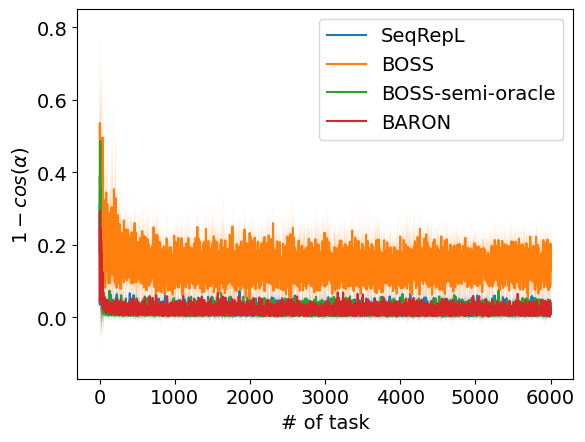

In [ ]:
if plot_prev_data:
    (
        mean_PEGE,
        std_PEGE,
        mean_PEGE_oracle,
        std_PEGE_oracle,
        mean_PMA,
        std_PMA,
        mean_PMA_no_oracle,
        std_PMA_no_oracle,
        mean_SeqRepL,
        std_SeqRepL,
        mean_BARON,
        std_BARON,
    ) = load_dict("cache_data/TaskDiv_angle2.npy")
else:
    mean_PMA = np.mean(best_PMA["angle_err"], axis=0)
    std_PMA = np.std(best_PMA["angle_err"], axis=0)
    mean_SeqRepL = np.mean(best_SeqRepL["angle_err"], axis=0)
    std_SeqRepL = np.std(best_SeqRepL["angle_err"], axis=0)
    mean_PMA_no_oracle = np.mean(best_PMA_no_oracle["angle_err"], axis=0)
    std_PMA_no_oracle = np.std(best_PMA_no_oracle["angle_err"], axis=0)
    mean_BARON = np.mean(best_BARON["angle_err"], axis=0)
    std_BARON = np.std(best_BARON["angle_err"], axis=0)

X = np.arange(1, n_task + 1)
plt.plot(X, mean_SeqRepL, "-", label="SeqRepL")
plt.fill_between(X, mean_SeqRepL - std_SeqRepL, mean_SeqRepL + std_SeqRepL, alpha=0.5)
plt.plot(X, mean_PMA_no_oracle, "-", label="BOSS")
plt.fill_between(
    X,
    mean_PMA_no_oracle - std_PMA_no_oracle,
    mean_PMA_no_oracle + std_PMA_no_oracle,
    alpha=0.5,
)
plt.plot(X, mean_PMA, "-", label="BOSS-semi-oracle")
plt.fill_between(X, mean_PMA - std_PMA, mean_PMA + std_PMA, alpha=0.5)
plt.plot(X, mean_BARON, "-", label="BARON")
plt.fill_between(X, mean_BARON - std_BARON, mean_BARON + std_BARON, alpha=0.5)
plt.xlabel("# of task")
plt.ylabel(r"$1-cos(\alpha)$")
plt.legend()
plt.show()
# plt.close()
# output_dict = {
#     "mean_PMA2":mean_PMA,
#     "std_PMA2":std_PMA,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle,
#     "std_PMA_no_oracle2":std_PMA_no_oracle,
#     "mean_SeqRepL2":mean_SeqRepL,
#     "std_SeqRepL2":std_SeqRepL,
#     "mean_BARON2":mean_BARON,
#     "std_BARON2":std_BARON,
# }
# np.save('cache_data/TaskDiv_angle2.npy', output_dict)

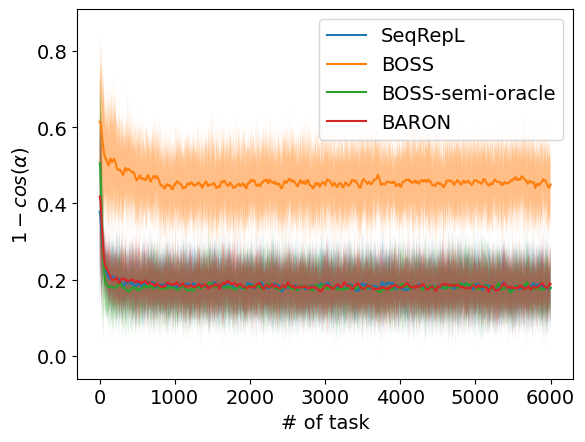

In [31]:
rbf = Rbf(X, mean_PMA_no_oracle, function="multiquadric", smooth=500)
y_PMA_no_oracle_rbf = rbf(X)
rbf = Rbf(X, mean_PMA, function="multiquadric", smooth=500)
y_PMA_rbf = rbf(X)
rbf = Rbf(X, mean_SeqRepL, function="multiquadric", smooth=500)
y_SeqRepL_rbf = rbf(X)
rbf = Rbf(X, mean_BARON, function="multiquadric", smooth=500)
y_BARON_rbf = rbf(X)

plt.plot(X, y_SeqRepL_rbf, "-", label="SeqRepL")
plt.fill_between(X, y_SeqRepL_rbf - std_SeqRepL, y_SeqRepL_rbf + std_SeqRepL, alpha=0.5)
plt.plot(X, y_PMA_no_oracle_rbf, "-", label="BOSS")
plt.fill_between(
    X,
    y_PMA_no_oracle_rbf - std_PMA_no_oracle,
    y_PMA_no_oracle_rbf + std_PMA_no_oracle,
    alpha=0.5,
)
plt.plot(X, y_PMA_rbf, "-", label="BOSS-semi-oracle")
plt.fill_between(X, y_PMA_rbf - std_PMA, y_PMA_rbf + std_PMA, alpha=0.5)
plt.plot(X, y_BARON_rbf, "-", label="BARON")
plt.fill_between(X, y_BARON_rbf - std_BARON, y_BARON_rbf + std_BARON, alpha=0.5)
plt.xlabel("# of task")
plt.savefig('figures/div_angle.png', bbox_inches='tight', pad_inches=0.1)
plt.ylabel(r"$1-cos(\alpha)$")

plt.legend()
plt.show()

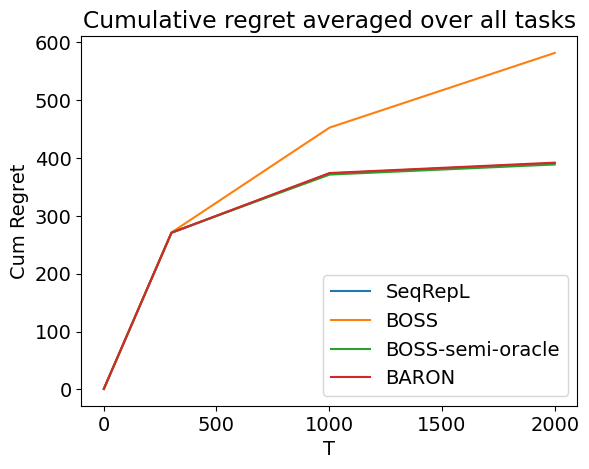

In [ ]:
if plot_prev_data:
    (
        mean_PEGE_in_T,
        std_PEGE_in_T,
        mean_PEGE_oracle_in_T,
        std_PEGE_oracle_in_T,
        mean_PMA_in_T,
        std_PMA_in_T,
        mean_PMA_no_oracle_in_T,
        std_PMA_no_oracle_in_T,
        mean_SeqRepL_in_T,
        std_SeqRepL_in_T,
        mean_BARON_in_T,
        std_BARON_in_T,
    ) = load_dict("cache_data/TaskDiv_T2.npy")
else:
    mean_PEGE_in_T = np.mean(best_PEGE["regrets_all"], axis=(0, -1))
    std_PEGE_in_T = np.std(best_PEGE["regrets_all"], axis=(0, -1))
    mean_PEGE_oracle_in_T = np.mean(best_PEGE_oracle["regrets_all"], axis=(0, -1))
    std_PEGE_oracle_in_T = np.std(best_PEGE_oracle["regrets_all"], axis=(0, -1))
    mean_PMA_in_T = np.mean(best_PMA["regrets_all"], axis=(0, -1))
    std_PMA_in_T = np.std(best_PMA["regrets_all"], axis=(0, -1))
    mean_PMA_no_oracle_in_T = np.mean(best_PMA_no_oracle["regrets_all"], axis=(0, -1))
    std_PMA_no_oracle_in_T = np.std(best_PMA_no_oracle["regrets_all"], axis=(0, -1))
    mean_SeqRepL_in_T = np.mean(best_SeqRepL["regrets_all"], axis=(0, -1))
    std_SeqRepL_in_T = np.std(best_SeqRepL["regrets_all"], axis=(0, -1))
    mean_BARON_in_T = np.mean(best_BARON["regrets_all"], axis=(0, -1))
    std_BARON_in_T = np.std(best_BARON["regrets_all"], axis=(0, -1))

X = np.arange(1, T + 1)
plt.plot(X, mean_SeqRepL_in_T, "-", label="SeqRepL")
plt.plot(X, mean_PMA_no_oracle_in_T, "-", label="BOSS")
plt.plot(X, mean_PMA_in_T, "-", label="BOSS-semi-oracle")
plt.plot(X, mean_BARON_in_T, "-", label="BARON")
# plt.plot(X, mean_PEGE_in_T, "-", label="PEGE")
# plt.plot(X, mean_PEGE_oracle_in_T, "-", label="PEGE-oracle")
# plt.fill_between(X, mean_SeqRepL_in_T-std_SeqRepL_in_T, mean_SeqRepL_in_T+std_SeqRepL_in_T, alpha=0.5)
# plt.fill_between(X, mean_PMA_no_oracle_in_T-std_PMA_no_oracle_in_T, mean_PMA_no_oracle_in_T+std_PMA_no_oracle_in_T, alpha=0.5)
# plt.fill_between(X, mean_PMA_in_T-std_PMA_in_T, mean_PMA_in_T+std_PMA_in_T, alpha=0.5)
# plt.fill_between(X, mean_PEGE_in_T-std_PEGE_in_T, mean_PEGE_in_T+std_PEGE_in_T, alpha=0.5)
# plt.fill_between(X, mean_PEGE_oracle_in_T-std_PEGE_oracle_in_T, mean_PEGE_oracle_in_T+std_PEGE_oracle_in_T, alpha=0.5)
plt.xlabel("T")
plt.ylabel("Cum Regret")
plt.legend()
plt.title(f"Cumulative regret averaged over all tasks")
plt.savefig('figures/div_T.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
# plt.close()
# output_dict = {
#     "mean_PEGE2":mean_PEGE_in_T,
#     "std_PEGE2":std_PEGE_in_T,
#     "mean_PEGE_oracle2":mean_PEGE_oracle_in_T,
#     "std_PEGE_oracle2":std_PEGE_oracle_in_T,
#     "mean_PMA2":mean_PMA_in_T,
#     "std_PMA2":std_PMA_in_T,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle_in_T,
#     "std_PMA_no_oracle2":std_PMA_no_oracle_in_T,
#     "mean_SeqRepL2":mean_SeqRepL_in_T,
#     "std_SeqRepL2":std_SeqRepL_in_T,
#     "mean_BARON2":mean_BARON_in_T,
#     "std_BARON2":std_BARON_in_T,
# }
# np.save('cache_data/TaskDiv_T2.npy', output_dict)

# Without Task Diversity

In [12]:
input_dict["mode"] = MODE_ADVERSARY
input_dict["n_sim"] = 5
input_dict["adv_exr_task"] = [0, 500, 1000]
SeqRepL_exr_list = get_SeqRepL_exr_list(input_dict["n_task"])
input_dict["SeqRepL_exr_list"] = SeqRepL_exr_list

# input_dict["fixed_params"] = None # fixed params for [p, tau1, tau2]
input_dict["fixed_params"] = [
    5 * len(SeqRepL_exr_list) / input_dict["n_task"],
    1000,
    300,
]  # fixed params for [p, tau1, tau2]
check_params()

In [ ]:
input_dict["name"] = "PEGE"
input_dict["params_set"] = [190, 210]  # tau_1
best_PEGE2 = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PEGE_oracle"
input_dict["params_set"] = [45, 55]  # tau_1
best_PEGE_oracle2 = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PMA"
input_dict["PMA_no_oracle"] = False
best_PMA2 = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "PMA"
input_dict["PMA_no_oracle"] = True

best_PMA_no_oracle2 = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "SeqRepL"
best_SeqRepL2 = eval_multi(input_dict)

In [ ]:
input_dict["name"] = "BARON"
best_BARON2 = eval_multi(input_dict)

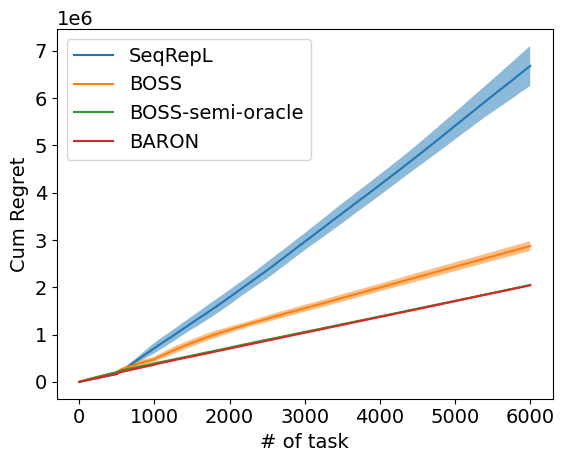

In [ ]:
plot_prev_data = True
if plot_prev_data:
    (
        mean_PEGE2,
        std_PEGE2,
        mean_PEGE_oracle2,
        std_PEGE_oracle2,
        mean_PMA2,
        std_PMA2,
        mean_PMA_no_oracle2,
        std_PMA_no_oracle2,
        mean_SeqRepL2,
        std_SeqRepL2,
        mean_BARON2,
        std_BARON2,
    ) = load_dict("cache_data/NoTaskDiv_RegExp2.npy")
else:
    mean_PEGE2 = np.mean(best_PEGE2["regrets"], axis=0)
    std_PEGE2 = np.std(best_PEGE2["regrets"], axis=0)
    mean_PEGE_oracle2 = np.mean(best_PEGE_oracle2["regrets"], axis=0)
    std_PEGE_oracle2 = np.std(best_PEGE_oracle2["regrets"], axis=0)
    mean_PMA2 = np.mean(best_PMA2["regrets"], axis=0)
    std_PMA2 = np.std(best_PMA2["regrets"], axis=0)
    mean_PMA_no_oracle2 = np.mean(best_PMA_no_oracle2["regrets"], axis=0)
    std_PMA_no_oracle2 = np.std(best_PMA_no_oracle2["regrets"], axis=0)
    mean_SeqRepL2 = np.mean(best_SeqRepL2["regrets"], axis=0)
    std_SeqRepL2 = np.std(best_SeqRepL2["regrets"], axis=0)
    mean_BARON2 = np.mean(best_BARON2["regrets"], axis=0)
    std_BARON2 = np.std(best_BARON2["regrets"], axis=0)
X = np.arange(1, n_task + 1)
plt.plot(X, mean_SeqRepL2, "-", label="SeqRepL")
plt.fill_between(
    X, mean_SeqRepL2 - std_SeqRepL2, mean_SeqRepL2 + std_SeqRepL2, alpha=0.5
)
plt.plot(X, mean_PMA_no_oracle2, "-", label="BOSS")
plt.fill_between(
    X,
    mean_PMA_no_oracle2 - std_PMA_no_oracle2,
    mean_PMA_no_oracle2 + std_PMA_no_oracle2,
    alpha=0.5,
)
plt.plot(X, mean_PMA2, "-", label="BOSS-semi-oracle")
plt.fill_between(X, mean_PMA2 - std_PMA2, mean_PMA2 + std_PMA2, alpha=0.5)
# plt.plot(X, mean_PEGE2, "-", label="PEGE")
# plt.fill_between(X, mean_PEGE2 - std_PEGE2, mean_PEGE2 + std_PEGE2, alpha=0.5)
# plt.plot(X, mean_PEGE_oracle2, "-", label="PEGE-oracle")
# plt.fill_between(
#     X,
#     mean_PEGE_oracle2 - std_PEGE_oracle2,
#     mean_PEGE_oracle2 + std_PEGE_oracle2,
#     alpha=0.5,
# )
plt.plot(X, mean_BARON2, "-", label="BARON")
plt.fill_between(
    X, mean_BARON2 - std_BARON2, mean_BARON2 + std_BARON2, alpha=0.5
)
plt.xlabel("# of task")
plt.ylabel("Cum Regret")
plt.legend()
plt.savefig('figures/no_div_reg.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
# plt.close()
# output_dict = {
#     "mean_PEGE2":mean_PEGE2,
#     "std_PEGE2":std_PEGE2,
#     "mean_PEGE_oracle2":mean_PEGE_oracle2,
#     "std_PEGE_oracle2":std_PEGE_oracle2,
#     "mean_PMA2":mean_PMA2,
#     "std_PMA2":std_PMA2,
#     # "mean_PMA_stop_exr2":mean_PMA_stop_exr2,
#     # "std_PMA_stop_exr2":std_PMA_stop_exr2,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle2,
#     "std_PMA_no_oracle2":std_PMA_no_oracle2,
#     "mean_SeqRepL2":mean_SeqRepL2,
#     "std_SeqRepL2":std_SeqRepL2,
#     "mean_BARON2":mean_BARON2,
#     "std_BARON2":std_BARON2,
# }
# np.save('cache_data/NoTaskDiv_RegExp2.npy', output_dict)

2025-05-25 01:11:50 Substituting symbol \perp from STIXGeneral
2025-05-25 01:11:50 Substituting symbol \perp from STIXGeneral


2025-05-25 01:11:50 Substituting symbol \perp from STIXGeneral
2025-05-25 01:11:50 Substituting symbol \perp from STIXGeneral
2025-05-25 01:11:50 Substituting symbol \perp from STIXGeneral
2025-05-25 01:11:50 Substituting symbol \perp from STIXGeneral
2025-05-25 01:11:50 Substituting symbol \perp from STIXGeneral
2025-05-25 01:11:50 Substituting symbol \perp from STIXGeneral


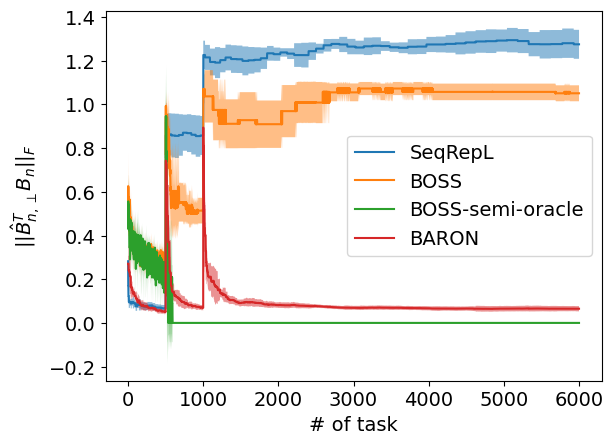

In [ ]:
if plot_prev_data:
    (
        mean_PEGE2,
        std_PEGE2,
        mean_PEGE_oracle2,
        std_PEGE_oracle2,
        mean_PMA2,
        std_PMA2,
        mean_PMA_no_oracle2,
        std_PMA_no_oracle2,
        mean_SeqRepL2,
        std_SeqRepL2,
        mean_BARON2,
        std_BARON2,
    ) = load_dict("cache_data/NoTaskDiv_B2.npy")
else:
    mean_PMA2 = np.mean(best_PMA2["B_hat_err"], axis=0)
    std_PMA2 = np.std(best_PMA2["B_hat_err"], axis=0)
    mean_SeqRepL2 = np.mean(best_SeqRepL2["B_hat_err"], axis=0)
    std_SeqRepL2 = np.std(best_SeqRepL2["B_hat_err"], axis=0)
    mean_PMA_no_oracle2 = np.mean(best_PMA_no_oracle2["B_hat_err"], axis=0)
    std_PMA_no_oracle2 = np.std(best_PMA_no_oracle2["B_hat_err"], axis=0)
    mean_BARON2 = np.mean(best_BARON2["B_hat_err"], axis=0)
    std_BARON2 = np.std(best_BARON2["B_hat_err"], axis=0)

X = np.arange(1, n_task + 1)
plt.plot(X, mean_SeqRepL2, "-", label="SeqRepL")
plt.fill_between(
    X, mean_SeqRepL2 - std_SeqRepL2, mean_SeqRepL2 + std_SeqRepL2, alpha=0.5
)
plt.plot(X, mean_PMA_no_oracle2, "-", label="BOSS")
plt.fill_between(
    X,
    mean_PMA_no_oracle2 - std_PMA_no_oracle2,
    mean_PMA_no_oracle2 + std_PMA_no_oracle2,
    alpha=0.5,
)
plt.plot(X, mean_PMA2, "-", label="BOSS-semi-oracle")
plt.fill_between(X, mean_PMA2 - std_PMA2, mean_PMA2 + std_PMA2, alpha=0.5)
plt.plot(X, mean_BARON2, "-", label="BARON")
plt.fill_between(
    X, mean_BARON2 - std_BARON2, mean_BARON2 + std_BARON2, alpha=0.5
)
plt.xlabel("# of task")
plt.ylabel(r"$||\hat{B}_{n, \perp}^T B_n||_F$")
plt.legend()
plt.savefig('figures/no_div_B.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
# plt.close()
# output_dict = {
#     "mean_PMA2":mean_PMA2,
#     "std_PMA2":std_PMA2,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle2,
#     "std_PMA_no_oracle2":std_PMA_no_oracle2,
#     "mean_SeqRepL2":mean_SeqRepL2,
#     "std_SeqRepL2":std_SeqRepL2,
#     "mean_BARON2":mean_BARON2,
#     "std_BARON2":std_BARON2,
# }
# np.save('cache_data/NoTaskDiv_B2.npy', output_dict)

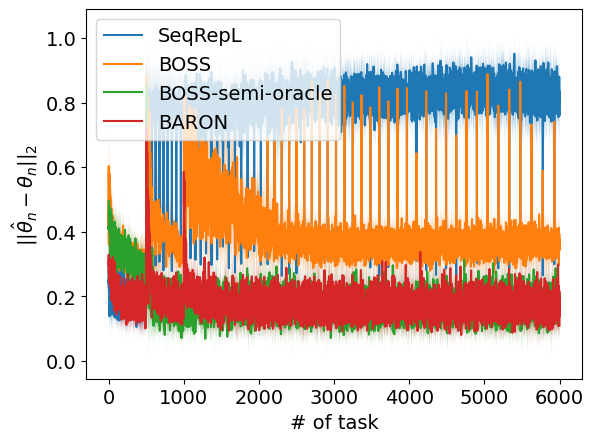

In [ ]:
if plot_prev_data:
    (
        mean_PEGE2,
        std_PEGE2,
        mean_PEGE_oracle2,
        std_PEGE_oracle2,
        mean_PMA2,
        std_PMA2,
        mean_PMA_no_oracle2,
        std_PMA_no_oracle2,
        mean_SeqRepL2,
        std_SeqRepL2,
        mean_BARON2,
        std_BARON2,
    ) = load_dict("cache_data/NoTaskDiv_theta2.npy")
else:
    mean_PMA2 = np.mean(best_PMA2["theta_hat_err"], axis=0)
    std_PMA2 = np.std(best_PMA2["theta_hat_err"], axis=0)
    mean_SeqRepL2 = np.mean(best_SeqRepL2["theta_hat_err"], axis=0)
    std_SeqRepL2 = np.std(best_SeqRepL2["theta_hat_err"], axis=0)
    mean_PMA_no_oracle2 = np.mean(best_PMA_no_oracle2["theta_hat_err"], axis=0)
    std_PMA_no_oracle2 = np.std(best_PMA_no_oracle2["theta_hat_err"], axis=0)
    mean_BARON2 = np.mean(best_BARON2["theta_hat_err"], axis=0)
    std_BARON2 = np.std(best_BARON2["theta_hat_err"], axis=0)

X = np.arange(1, n_task + 1)
plt.plot(X, mean_SeqRepL2, "-", label="SeqRepL")
plt.fill_between(
    X, mean_SeqRepL2 - std_SeqRepL2, mean_SeqRepL2 + std_SeqRepL2, alpha=0.5
)
plt.plot(X, mean_PMA_no_oracle2, "-", label="BOSS")
plt.fill_between(
    X,
    mean_PMA_no_oracle2 - std_PMA_no_oracle2,
    mean_PMA_no_oracle2 + std_PMA_no_oracle2,
    alpha=0.5,
)
plt.plot(X, mean_PMA2, "-", label="BOSS-semi-oracle")
plt.fill_between(X, mean_PMA2 - std_PMA2, mean_PMA2 + std_PMA2, alpha=0.5)
plt.plot(X, mean_BARON2, "-", label="BARON")
plt.fill_between(
    X, mean_BARON2 - std_BARON2, mean_BARON2 + std_BARON2, alpha=0.5
)
plt.xlabel("# of task")
plt.ylabel(r"$||\hat{\theta}_n - \theta_n||_2$")
plt.legend()
plt.show()
# plt.close()
# output_dict = {
#     "mean_PMA2":mean_PMA2,
#     "std_PMA2":std_PMA2,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle2,
#     "std_PMA_no_oracle2":std_PMA_no_oracle2,
#     "mean_SeqRepL2":mean_SeqRepL2,
#     "std_SeqRepL2":std_SeqRepL2,
#     "mean_BARON2":mean_BARON2,
#     "std_BARON2":std_BARON2,
# }
# np.save('cache_data/NoTaskDiv_theta2.npy', output_dict)

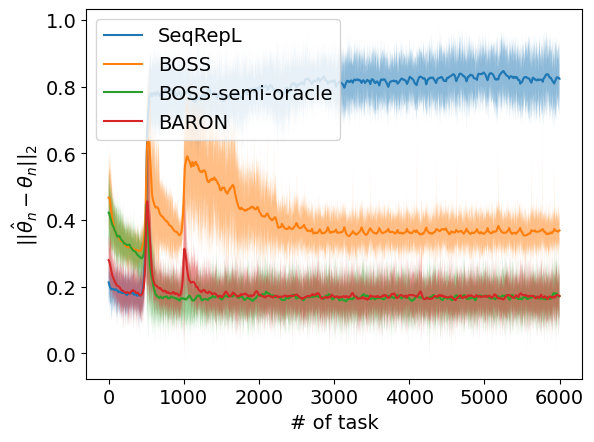

In [41]:
rbf = Rbf(X, mean_PMA_no_oracle2, function="multiquadric", smooth=500)
y_PMA_no_oracle_rbf2 = rbf(X)
rbf = Rbf(X, mean_PMA2, function="multiquadric", smooth=500)
y_PMA_rbf2 = rbf(X)
rbf = Rbf(X, mean_SeqRepL2, function="multiquadric", smooth=500)
y_SeqRepL_rbf2 = rbf(X)
rbf = Rbf(X, mean_BARON2, function="multiquadric", smooth=500)
y_BARON_rbf2 = rbf(X)

plt.plot(X, y_SeqRepL_rbf2, "-", label="SeqRepL")
plt.fill_between(
    X, y_SeqRepL_rbf2 - std_SeqRepL2, y_SeqRepL_rbf2 + std_SeqRepL2, alpha=0.5
)
plt.plot(X, y_PMA_no_oracle_rbf2, "-", label="BOSS")
plt.fill_between(
    X,
    y_PMA_no_oracle_rbf2 - std_PMA_no_oracle2,
    y_PMA_no_oracle_rbf2 + std_PMA_no_oracle2,
    alpha=0.5,
)
plt.plot(X, y_PMA_rbf2, "-", label="BOSS-semi-oracle")
plt.fill_between(X, y_PMA_rbf2 - std_PMA2, y_PMA_rbf2 + std_PMA2, alpha=0.5)

plt.plot(X, y_BARON_rbf2, "-", label="BARON")
plt.fill_between(X, y_BARON_rbf2 - std_BARON2, y_BARON_rbf2 + std_BARON2, alpha=0.5)
plt.xlabel("# of task")
plt.ylabel(r"$||\hat{\theta}_n - \theta_n||_2$")
plt.savefig('figures/no_div_theta.png', bbox_inches='tight', pad_inches=0.1)

plt.legend()
plt.show()

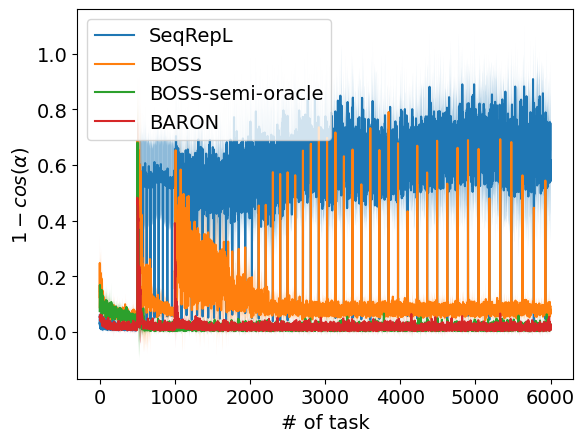

In [ ]:
if plot_prev_data:
    (
        mean_PEGE2,
        std_PEGE2,
        mean_PEGE_oracle2,
        std_PEGE_oracle2,
        mean_PMA2,
        std_PMA2,
        mean_PMA_no_oracle2,
        std_PMA_no_oracle2,
        mean_SeqRepL2,
        std_SeqRepL2,
        mean_BARON2,
        std_BARON2,
    ) = load_dict("cache_data/NoTaskDiv_angle2.npy")
else:
    mean_PMA2 = np.mean(best_PMA2["angle_err"], axis=0)
    std_PMA2 = np.std(best_PMA2["angle_err"], axis=0)
    mean_SeqRepL2 = np.mean(best_SeqRepL2["angle_err"], axis=0)
    std_SeqRepL2 = np.std(best_SeqRepL2["angle_err"], axis=0)
    mean_PMA_no_oracle2 = np.mean(best_PMA_no_oracle2["angle_err"], axis=0)
    std_PMA_no_oracle2 = np.std(best_PMA_no_oracle2["angle_err"], axis=0)
    mean_BARON2 = np.mean(best_BARON2["angle_err"], axis=0)
    std_BARON2 = np.std(best_BARON2["angle_err"], axis=0)

X = np.arange(1, n_task + 1)
plt.plot(X, mean_SeqRepL2, "-", label="SeqRepL")
plt.fill_between(
    X, mean_SeqRepL2 - std_SeqRepL2, mean_SeqRepL2 + std_SeqRepL2, alpha=0.5
)
plt.plot(X, mean_PMA_no_oracle2, "-", label="BOSS")
plt.fill_between(
    X,
    mean_PMA_no_oracle2 - std_PMA_no_oracle2,
    mean_PMA_no_oracle2 + std_PMA_no_oracle2,
    alpha=0.5,
)
plt.plot(X, mean_PMA2, "-", label="BOSS-semi-oracle")
plt.fill_between(X, mean_PMA2 - std_PMA2, mean_PMA2 + std_PMA2, alpha=0.5)
plt.plot(X, mean_BARON2, "-", label="BARON")
plt.fill_between(
    X, mean_BARON2 - std_BARON2, mean_BARON2 + std_BARON2, alpha=0.5
)
plt.xlabel("# of task")
plt.ylabel(r"$1-cos(\alpha)$")
plt.legend()
plt.show()
# plt.close()
# output_dict = {
#     "mean_PMA2":mean_PMA2,
#     "std_PMA2":std_PMA2,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle2,
#     "std_PMA_no_oracle2":std_PMA_no_oracle2,
#     "mean_SeqRepL2":mean_SeqRepL2,
#     "std_SeqRepL2":std_SeqRepL2,
#     "mean_BARON2":mean_BARON2,
#     "std_BARON2":std_BARON2,
# }
# np.save('cache_data/NoTaskDiv_angle2.npy', output_dict)

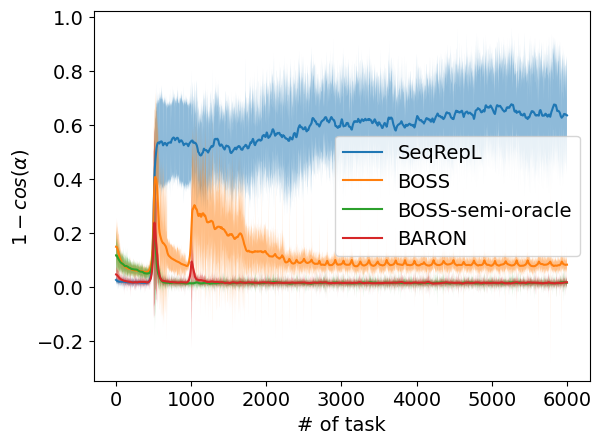

In [38]:
rbf = Rbf(X, mean_PMA_no_oracle2, function="multiquadric", smooth=500)
y_PMA_no_oracle_rbf2 = rbf(X)
rbf = Rbf(X, mean_PMA2, function="multiquadric", smooth=500)
y_PMA_rbf2 = rbf(X)
rbf = Rbf(X, mean_SeqRepL2, function="multiquadric", smooth=500)
y_SeqRepL_rbf2 = rbf(X)
rbf = Rbf(X, mean_BARON2, function="multiquadric", smooth=500)
y_BARON_rbf2 = rbf(X)

plt.plot(X, y_SeqRepL_rbf2, "-", label="SeqRepL")
plt.fill_between(
    X, y_SeqRepL_rbf2 - std_SeqRepL2, y_SeqRepL_rbf2 + std_SeqRepL2, alpha=0.5
)
plt.plot(X, y_PMA_no_oracle_rbf2, "-", label="BOSS")
plt.fill_between(
    X,
    y_PMA_no_oracle_rbf2 - std_PMA_no_oracle2,
    y_PMA_no_oracle_rbf2 + std_PMA_no_oracle2,
    alpha=0.5,
)
plt.plot(X, y_PMA_rbf2, "-", label="BOSS-semi-oracle")
plt.fill_between(X, y_PMA_rbf2 - std_PMA2, y_PMA_rbf2 + std_PMA2, alpha=0.5)

plt.plot(X, y_BARON_rbf2, "-", label="BARON")
plt.fill_between(X, y_BARON_rbf2 - std_BARON2, y_BARON_rbf2 + std_BARON2, alpha=0.5)
plt.xlabel("# of task")
plt.ylabel(r"$1-cos(\alpha)$")
plt.savefig('figures/no_div_angle.png', bbox_inches='tight', pad_inches=0.1)
plt.legend()
plt.show()

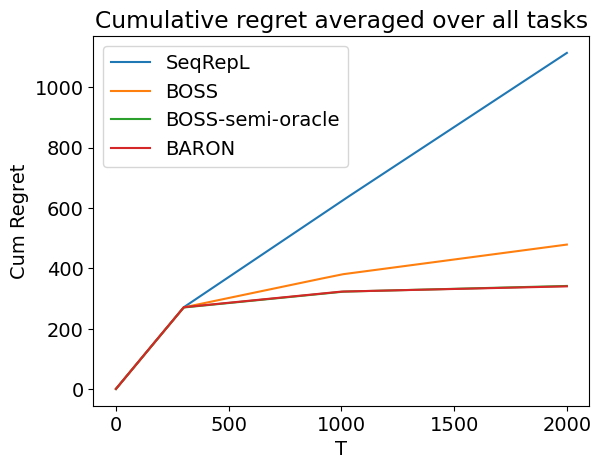

In [ ]:
if plot_prev_data:
    (
        mean_PEGE2_in_T,
        std_PEGE2_in_T,
        mean_PEGE_oracle2_in_T,
        std_PEGE_oracle2_in_T,
        mean_PMA2_in_T,
        std_PMA2_in_T,
        mean_PMA_no_oracle2_in_T,
        std_PMA_no_oracle2_in_T,
        mean_SeqRepL2_in_T,
        std_SeqRepL2_in_T,
        mean_BARON2_in_T,
        std_BARON2_in_T,
    ) = load_dict("cache_data/NoTaskDiv_T2.npy")
else:
    mean_PEGE2_in_T = np.mean(best_PEGE2["regrets_all"], axis=(0, -1))
    std_PEGE2_in_T = np.std(best_PEGE2["regrets_all"], axis=(0, -1))
    mean_PEGE_oracle2_in_T = np.mean(best_PEGE_oracle2["regrets_all"], axis=(0, -1))
    std_PEGE_oracle2_in_T = np.std(best_PEGE_oracle2["regrets_all"], axis=(0, -1))
    mean_PMA2_in_T = np.mean(best_PMA2["regrets_all"], axis=(0, -1))
    std_PMA2_in_T = np.std(best_PMA2["regrets_all"], axis=(0, -1))
    mean_PMA_no_oracle2_in_T = np.mean(best_PMA_no_oracle2["regrets_all"], axis=(0, -1))
    std_PMA_no_oracle2_in_T = np.std(best_PMA_no_oracle2["regrets_all"], axis=(0, -1))
    mean_SeqRepL2_in_T = np.mean(best_SeqRepL2["regrets_all"], axis=(0, -1))
    std_SeqRepL2_in_T = np.std(best_SeqRepL2["regrets_all"], axis=(0, -1))
    mean_BARON2_in_T = np.mean(best_BARON2["regrets_all"], axis=(0, -1))
    std_BARON2_in_T = np.std(best_BARON2["regrets_all"], axis=(0, -1))

X = np.arange(1, T + 1)
plt.plot(X, mean_SeqRepL2_in_T, "-", label="SeqRepL")
plt.plot(X, mean_PMA_no_oracle2_in_T, "-", label="BOSS")
plt.plot(X, mean_PMA2_in_T, "-", label="BOSS-semi-oracle")
plt.plot(X, mean_BARON2_in_T, "-", label="BARON")
# plt.plot(X, mean_PEGE2_in_T, "-", label="PEGE")
# plt.plot(X, mean_PEGE_oracle2_in_T, "-", label="PEGE-oracle")
# plt.fill_between(X, mean_SeqRepL2_in_T-std_SeqRepL2_in_T, mean_SeqRepL2_in_T+std_SeqRepL2_in_T, alpha=0.5)
# plt.fill_between(X, mean_PMA_no_oracle2_in_T-std_PMA_no_oracle2_in_T, mean_PMA_no_oracle2_in_T+std_PMA_no_oracle2_in_T, alpha=0.5)
# plt.fill_between(X, mean_PMA2_in_T-std_PMA2_in_T, mean_PMA2_in_T+std_PMA2_in_T, alpha=0.5)
# plt.fill_between(X, mean_PEGE2_in_T-std_PEGE2_in_T, mean_PEGE2_in_T+std_PEGE2_in_T, alpha=0.5)
# plt.fill_between(X, mean_PEGE_oracle2_in_T-std_PEGE_oracle2_in_T, mean_PEGE_oracle2_in_T+std_PEGE_oracle2_in_T, alpha=0.5)
plt.xlabel("T")
plt.ylabel("Cum Regret")
plt.legend()
plt.title(f"Cumulative regret averaged over all tasks")
plt.savefig('figures/no_div_T.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
# plt.close()
# output_dict = {
#     "mean_PEGE2":mean_PEGE2_in_T,
#     "std_PEGE2":std_PEGE2_in_T,
#     "mean_PEGE_oracle2":mean_PEGE_oracle2_in_T,
#     "std_PEGE_oracle2":std_PEGE_oracle2_in_T,
#     "mean_PMA2":mean_PMA2_in_T,
#     "std_PMA2":std_PMA2_in_T,
#     "mean_PMA_no_oracle2":mean_PMA_no_oracle2_in_T,
#     "std_PMA_no_oracle2":std_PMA_no_oracle2_in_T,
#     "mean_SeqRepL2":mean_SeqRepL2_in_T,
#     "std_SeqRepL2":std_SeqRepL2_in_T,
#     "mean_BARON2":mean_BARON2_in_T,
#     "std_BARON2":std_BARON2_in_T,
# }
# np.save('cache_data/NoTaskDiv_T2.npy', output_dict)